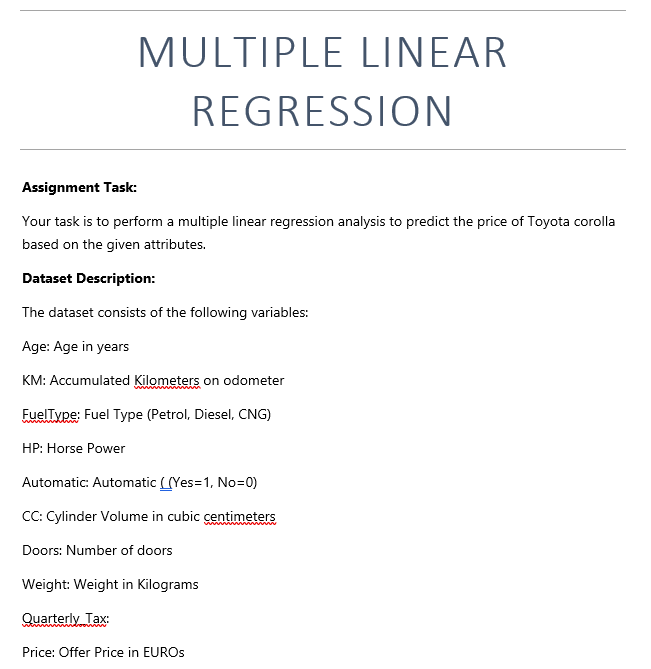

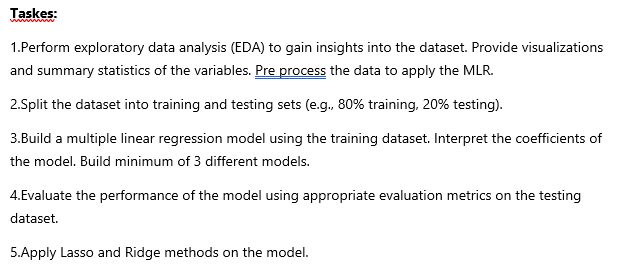

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


# EDA

In [3]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [4]:
df.isna().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

No missing values

In [5]:
# Check for duplicate rows

df.duplicated().sum()

1

In [6]:
# There is one duplicated row

df[df.duplicated(keep=False)]     # Show all duplicated rows

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
112,24950,8,13253,Diesel,116,0,2000,5,4,5,1320
113,24950,8,13253,Diesel,116,0,2000,5,4,5,1320


In [7]:
# Drop duplicated row

df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
# Reset the indices

df.reset_index(inplace=True)

In [10]:
df.drop(columns=['index'],inplace=True)

In [11]:
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [12]:
# One-hot encoding for Fuel_type column

one_hot_enc = pd.get_dummies(df['Fuel_Type'],prefix='Fuel')
one_hot_enc

,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,False,True,False
1,False,True,False
2,False,True,False
3,False,True,False
4,False,True,False
...,...,...,...
1430,False,False,True
1431,False,False,True
1432,False,False,True
1433,False,False,True


In [13]:
# Concatenate the above dataframe with df

df = pd.concat([df,one_hot_enc],axis=1)
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165,False,True,False
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165,False,True,False
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165,False,True,False
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165,False,True,False
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,0,1300,3,4,5,1025,False,False,True
1431,10845,72,19000,Petrol,86,0,1300,3,4,5,1015,False,False,True
1432,8500,71,17016,Petrol,86,0,1300,3,4,5,1015,False,False,True
1433,7250,70,16916,Petrol,86,0,1300,3,4,5,1015,False,False,True


In [14]:
# Drop the Fuel_Type column as we have converted it into numerical values

df.drop(columns=['Fuel_Type'],inplace=True)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,False,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,False,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,False,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,False,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,86,0,1300,3,4,5,1025,False,False,True
1431,10845,72,19000,86,0,1300,3,4,5,1015,False,False,True
1432,8500,71,17016,86,0,1300,3,4,5,1015,False,False,True
1433,7250,70,16916,86,0,1300,3,4,5,1015,False,False,True


<Axes: >

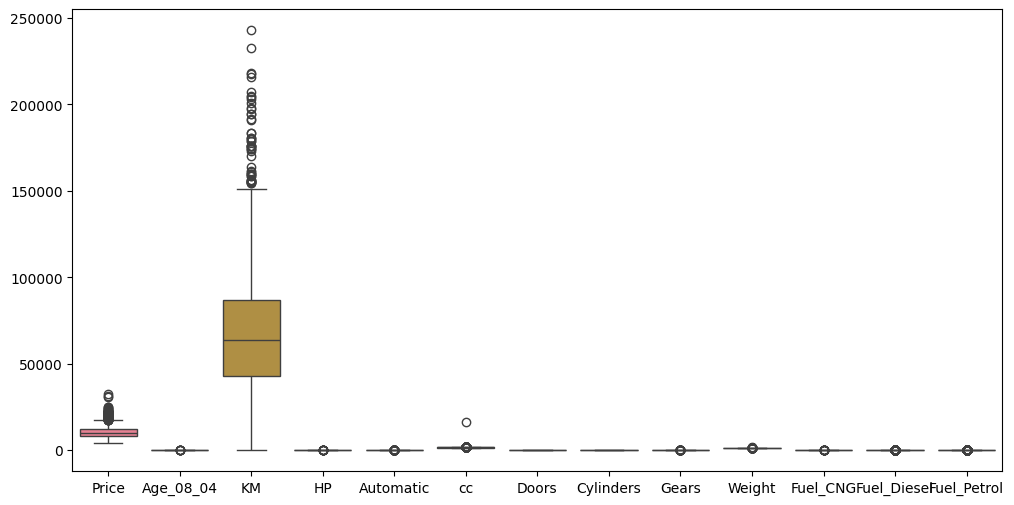

In [15]:
#Check for outliers
plt.figure(figsize=(12,6))
sns.boxplot(df)

In [16]:
# Create a function that finds the upper and lower extreme of each feature in a data set

def find_quantiles(data,colname):
    q1 = data[colname].quantile(0.25)
    q3 = data[colname].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    return lower, upper

In [17]:
df.head(1)

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,False,True,False


In [18]:
# Change the position of Automatic column as it is a categorical column with 0 and 1

# df.columns
# ['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Gears', 'Weight', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Petrol']

df = df.reindex(columns=['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Fuel_CNG', 'Fuel_Diesel', 'Fuel_Petrol', 'Automatic', 'Doors', 'Cylinders', 'Gears'])
df.head(1)

,Price,Age_08_04,KM,HP,cc,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol,Automatic,Doors,Cylinders,Gears
0,13500,23,46986,90,2000,1165,False,True,False,0,3,4,5


In [19]:
# Outlier capping for all numerical columns

'''for col in df.columns[:-7]:
    low_ext, up_ext = find_quantiles(df, col)
    try:
        df.loc[df[col] > up_ext, col] = up_ext            # For all values higher than upper extreme, replace with the upper extreme value itself
        df.loc[df[col] < low_ext, col] = low_ext          # For all values lower than lower extreme, replace with the lower extreme value itself
    except:
        pass'''

'for col in df.columns[:-7]:\n    low_ext, up_ext = find_quantiles(df, col)\n    try:\n        df.loc[df[col] > up_ext, col] = up_ext            # For all values higher than upper extreme, replace with the upper extreme value itself\n        df.loc[df[col] < low_ext, col] = low_ext          # For all values lower than lower extreme, replace with the lower extreme value itself\n    except:\n        pass'

<Axes: >

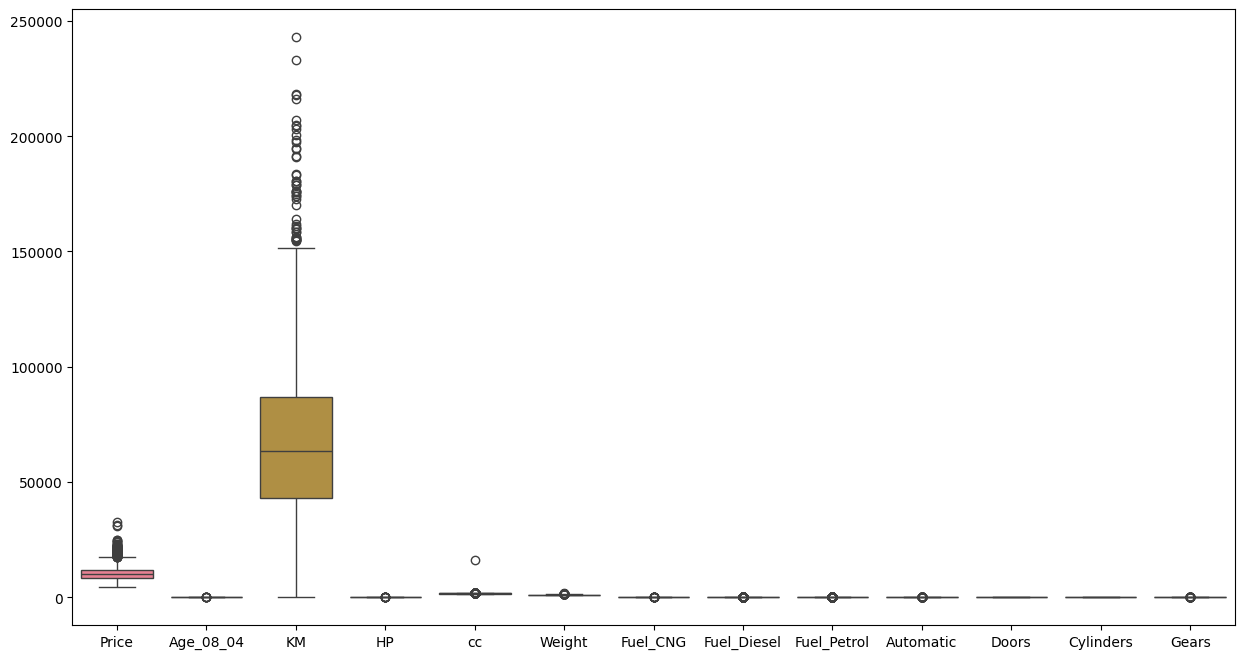

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot(df)

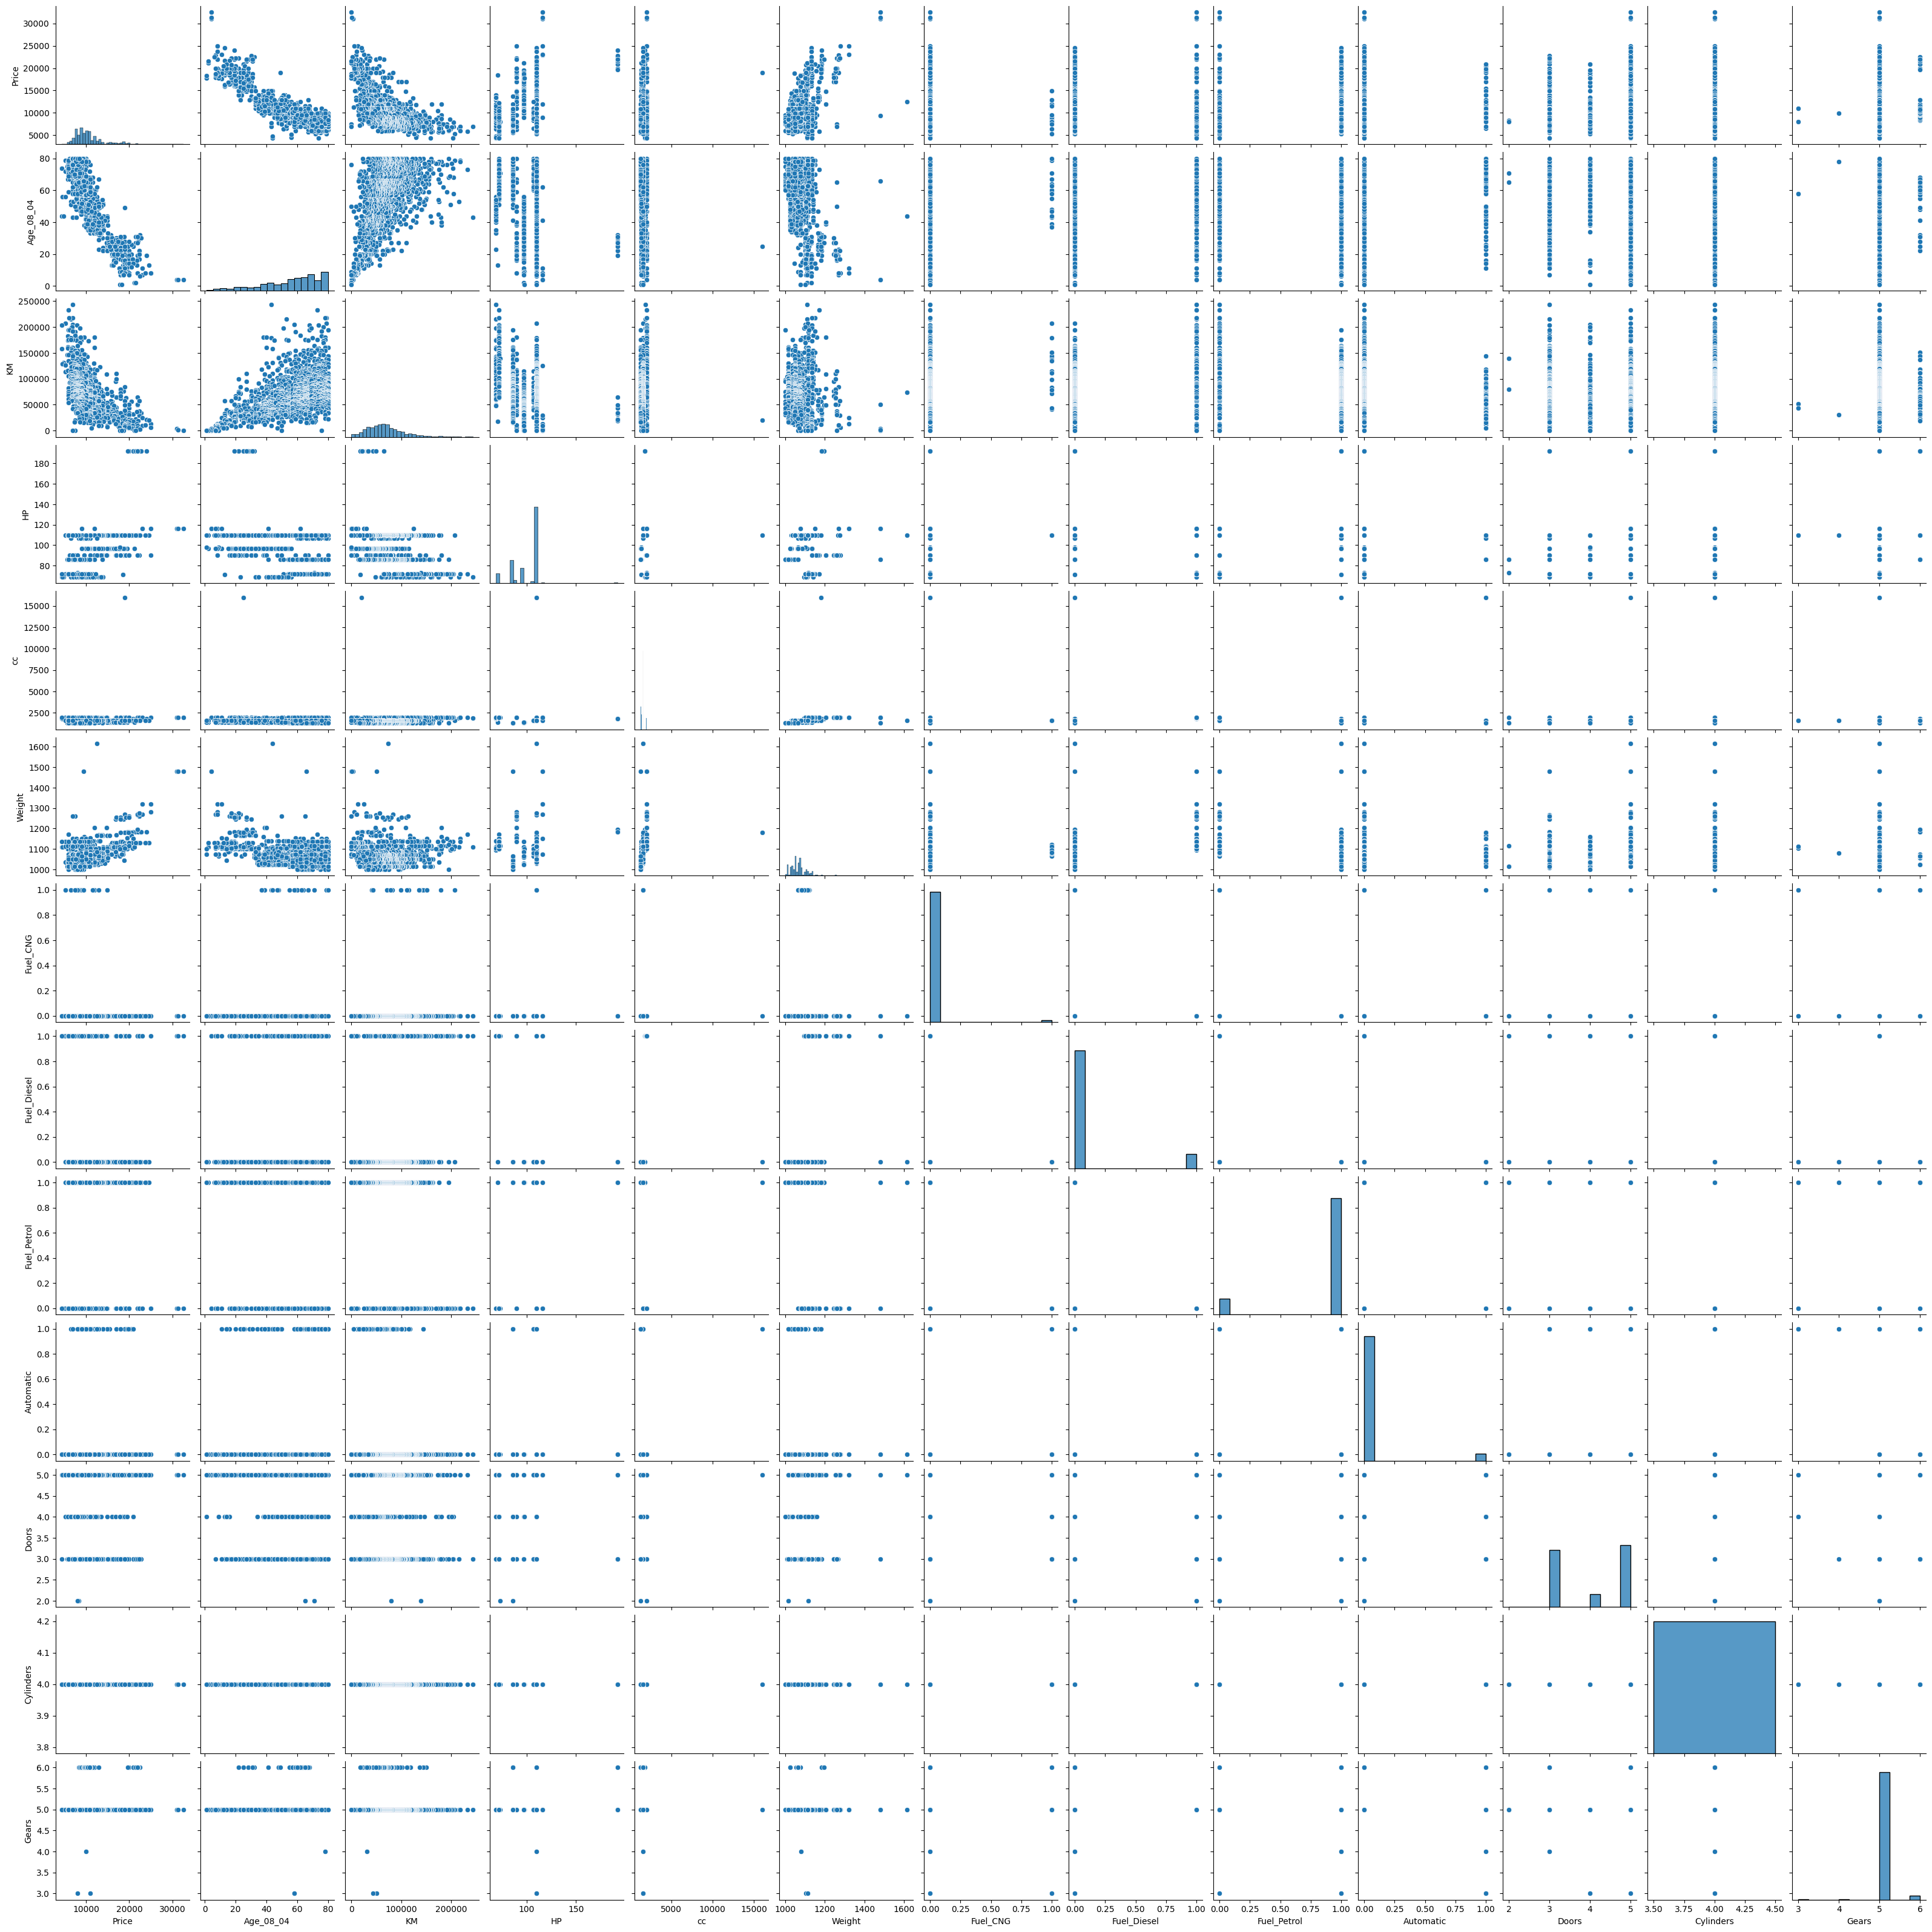

In [21]:
# Plot a pairplot of all the features in the dataset

sns.pairplot(df)

In [22]:
# Correlation matrix

df.corr()

,Price,Age_08_04,KM,HP,cc,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol,Automatic,Doors,Cylinders,Gears
Price,1.000000,-0.876273,-0.569420,0.314134,0.124375,0.575869,-0.039449,0.046612,-0.031356,0.033928,0.183604,NaN,0.063831
Age_08_04,-0.876273,1.000000,0.504575,-0.155293,-0.096549,-0.466484,0.002198,-0.093058,0.088169,0.031354,-0.146929,NaN,-0.005629
KM,-0.569420,0.504575,1.000000,-0.332904,0.103822,-0.023969,0.144013,0.407497,-0.437397,-0.082168,-0.035193,NaN,0.014890
HP,0.314134,-0.155293,-0.332904,1.000000,0.035207,0.087143,0.062203,-0.537116,0.492362,0.013313,0.091803,NaN,0.209642
cc,0.124375,-0.096549,0.103822,0.035207,1.000000,0.335077,0.006019,0.326780,-0.314200,0.066934,0.079254,NaN,0.014732
Weight,0.575869,-0.466484,-0.023969,0.087143,0.335077,1.000000,0.053530,0.564649,-0.557315,0.058499,0.301734,NaN,0.021238
Fuel_CNG,-0.039449,0.002198,0.144013,0.062203,0.006019,0.053530,1.000000,-0.037964,-0.297688,0.001467,0.009761,NaN,-0.049548
Fuel_Diesel,0.046612,-0.093058,0.407497,-0.537116,0.326780,0.564649,-0.037964,1.000000,-0.942673,-0.084248,0.023538,NaN,-0.048706
Fuel_Petrol,-0.031356,0.088169,-0.437397,0.492362,-0.314200,-0.557315,-0.297688,-0.942673,1.000000,0.079997,-0.025746,NaN,0.063079
Automatic,0.033928,0.031354,-0.082168,0.013313,0.066934,0.058499,0.001467,-0.084248,0.079997,1.000000,-0.027492,NaN,-0.098582


In [23]:
# Cylinders column doesnt have any variance throughout the dataset, hence will not be of importance in our analysis

df.drop(columns='Cylinders',inplace=True)

<Axes: >

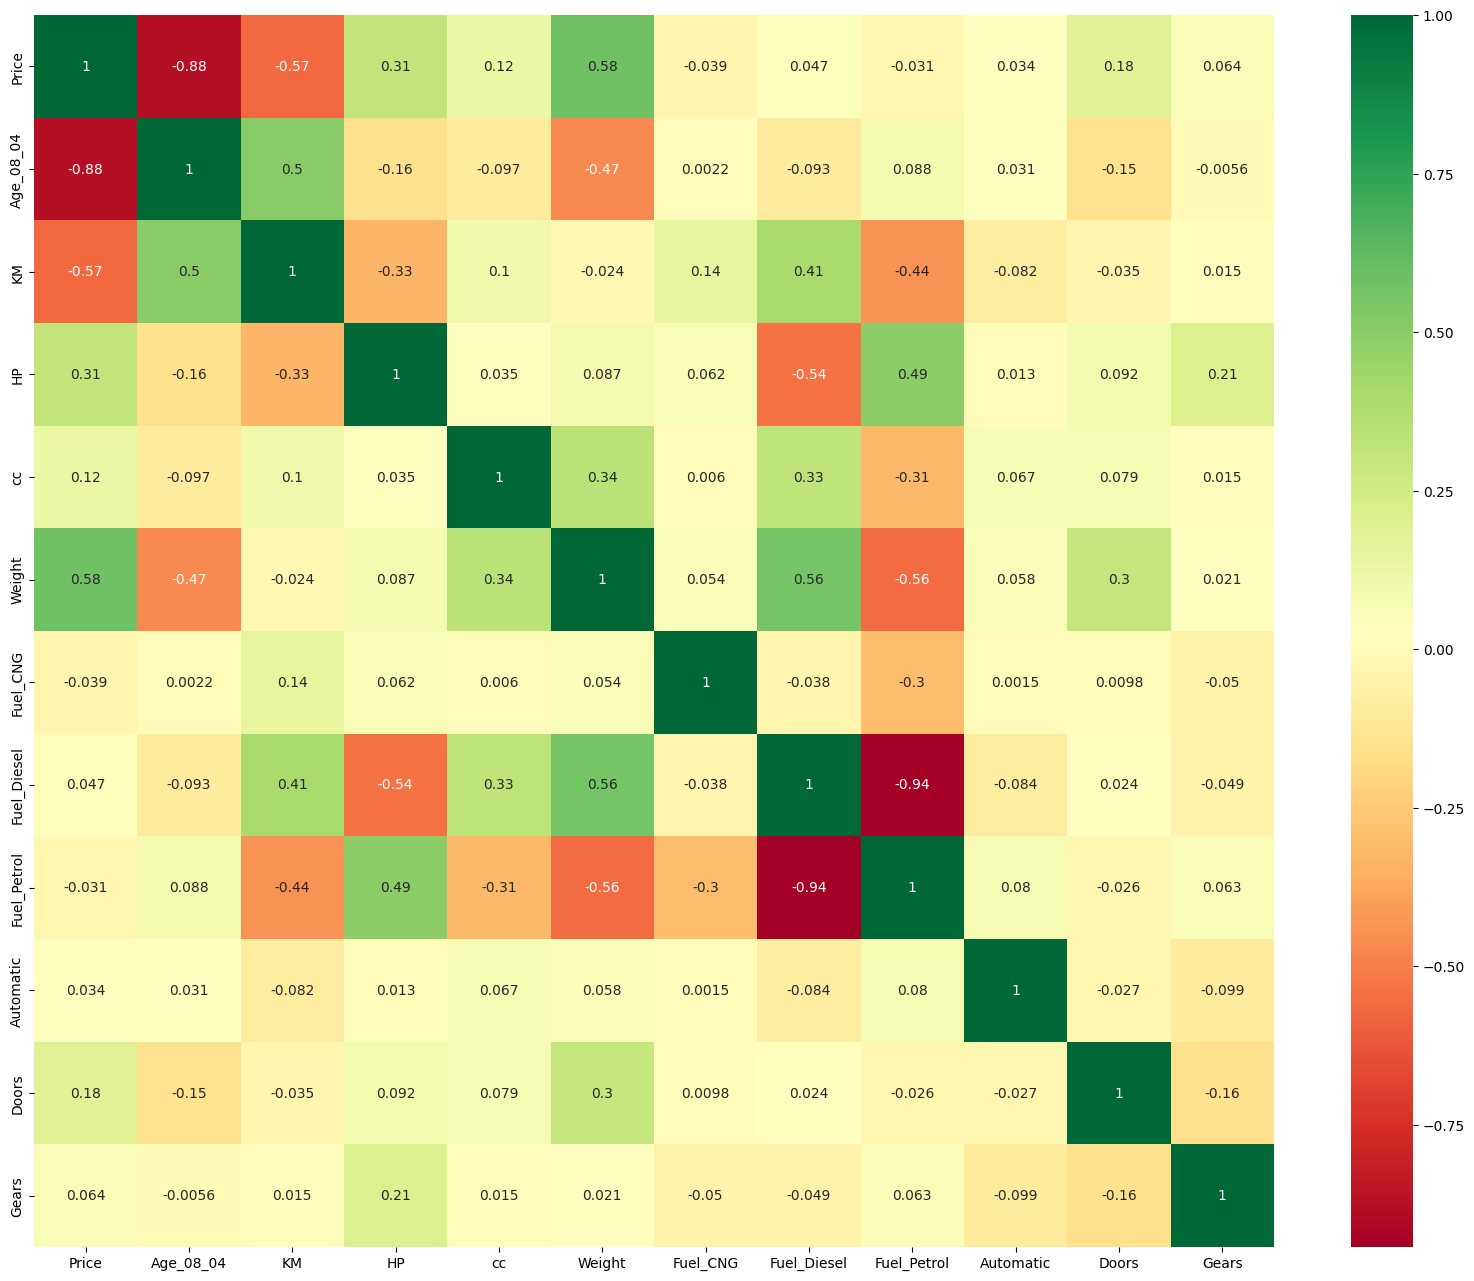

In [24]:
# Heatmap
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

# Model building

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x = df['Price']
y = df.drop(columns='Price')

In [27]:
# Create train and test set with 80-20 ratio
dftrain, dftest = train_test_split(df, test_size=0.2, random_state=42)

# Create a Regression model

In [28]:
dftrain.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Fuel_CNG',
       'Fuel_Diesel', 'Fuel_Petrol', 'Automatic', 'Doors', 'Gears'],
      dtype='object')

In [29]:
# Crete model 1
m1 = smf.ols('Price~Age_08_04+KM+HP+cc+Weight+Fuel_CNG+Fuel_Diesel+Fuel_Petrol+Automatic+Doors+Gears',data=dftrain).fit()

In [30]:
m1.rsquared, m1.aic

(0.8706011150336195, 19760.57187690778)

In [31]:
m1.pvalues

Intercept               1.130442e-13
Fuel_CNG[T.True]        2.627907e-12
Fuel_Diesel[T.True]     1.202100e-12
Fuel_Petrol[T.True]     6.005886e-10
Age_08_04              9.638587e-232
KM                      2.670129e-26
HP                      6.073573e-05
cc                      6.052350e-01
Weight                  2.300735e-61
Automatic               1.433261e-01
Doors                   5.174652e-02
Gears                   4.759196e-02
dtype: float64

For alpha = 0.05, we see that the columns 'cc', 'Doors' and 'Automatic' have p > alpha, therefore they have slope = 0 which means no contribution to the target column 'Price'.

Create three separate regression models with one of the above mentioned columns in each model.

In [32]:
m_cc = smf.ols('Price~Age_08_04+KM+HP+cc+Weight+Fuel_CNG+Fuel_Diesel+Fuel_Petrol+Gears',data=dftrain).fit()
m_cc.pvalues

Intercept               4.317299e-14
Fuel_CNG[T.True]        1.512247e-12
Fuel_Diesel[T.True]     3.711419e-13
Fuel_Petrol[T.True]     3.023983e-10
Age_08_04              8.191738e-233
KM                      1.428899e-27
HP                      5.971911e-05
cc                      7.032894e-01
Weight                  1.457082e-69
Gears                   2.186127e-02
dtype: float64

In [33]:
m_auto = smf.ols('Price~Age_08_04+KM+HP+Automatic+Weight+Fuel_CNG+Fuel_Diesel+Fuel_Petrol+Gears',data=dftrain).fit()
m_auto.pvalues

Intercept               3.282077e-13
Fuel_CNG[T.True]        6.292892e-12
Fuel_Diesel[T.True]     3.551987e-12
Fuel_Petrol[T.True]     9.463105e-10
Age_08_04              3.242901e-232
KM                      2.492695e-27
HP                      2.666297e-05
Automatic               1.033322e-01
Weight                  2.807674e-64
Gears                   1.644325e-02
dtype: float64

In [34]:
m_door = smf.ols('Price~Age_08_04+KM+HP+Doors+Weight+Fuel_CNG+Fuel_Diesel+Fuel_Petrol+Gears',data=dftrain).fit()
m_door.pvalues

Intercept               1.341064e-14
Fuel_CNG[T.True]        7.054622e-13
Fuel_Diesel[T.True]     5.890897e-14
Fuel_Petrol[T.True]     2.286760e-10
Age_08_04              4.031414e-233
KM                      1.543720e-26
HP                      1.395497e-04
Doors                   3.371361e-02
Weight                  2.988781e-67
Gears                   6.071570e-02
dtype: float64

In [35]:
m_cc.rsquared, m_cc.aic

(0.8698454698370434, 19763.256305514686)

In [36]:
m_auto.rsquared, m_auto.aic

(0.8701319026658937, 19760.72710239348)

In [37]:
m_door.rsquared, m_door.aic

(0.8703434228794853, 19758.85579470776)

The model with Door and Automatic columns have higher R-squared values, hence they tend to have higher accuracy

### Calculate VIF

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [39]:
#Create a new dataset without the target column

data = dftrain.drop(columns='Price')
data

,Age_08_04,KM,HP,cc,Weight,Fuel_CNG,Fuel_Diesel,Fuel_Petrol,Automatic,Doors,Gears
1127,78,109263,110,1600,1070,False,False,True,0,5,5
898,62,59295,86,1300,1035,False,False,True,0,5,5
1187,71,90370,86,1300,1035,False,False,True,0,5,5
310,44,38461,110,1600,1080,False,False,True,0,5,5
1144,75,101855,110,1600,1070,False,False,True,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...
1095,75,125400,110,1600,1050,False,False,True,0,3,5
1130,75,107000,110,1600,1050,False,False,True,0,3,5
1294,80,71500,110,1600,1035,False,False,True,0,4,5
860,65,64630,110,1600,1070,False,False,True,0,5,5


In [40]:
dfvif = pd.DataFrame()
dfvif['Features'] = data.columns
dfvif

,Features
0,Age_08_04
1,KM
2,HP
3,cc
4,Weight
5,Fuel_CNG
6,Fuel_Diesel
7,Fuel_Petrol
8,Automatic
9,Doors


In [41]:
# Convert True False into 1 and 0 for the Fuel type columns

data.replace({True:1,False:0},inplace=True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12504\4086645839.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({True:1,False:0},inplace=True)


In [42]:
dfvif['VIF'] = [vif(data.values,i) for i in range(len(data.columns))]

In [43]:
dfvif

,Features,VIF
0,Age_08_04,1.950878
1,KM,2.043053
2,HP,2.386329
3,cc,1.190131
4,Weight,3.810063
5,Fuel_CNG,25.946676
6,Fuel_Diesel,271.360079
7,Fuel_Petrol,1835.235711
8,Automatic,1.105248
9,Doors,1.226773


In [44]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     765.0
Date:                Sat, 22 Jun 2024   Prob (F-statistic):               0.00
Time:                        15:08:18   Log-Likelihood:                -9869.3
No. Observations:                1148   AIC:                         1.976e+04
Df Residuals:                    1137   BIC:                         1.982e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            -1.04e+04   1383.693     -7.517      0.000   -1.31e+04   -7686.737
Fuel_CNG[T.True]    -3713.6216    524.977     -7.074      0.000   -4743.655   -2683.589
Fuel_Diesel[T.True] -4103.3055    570.987     -7.186      0.000   -5223.612   -2982.999
Fuel_Petrol[T.True] -2584.6886    413.935     -6.244      0.000   -3396.850   -1772.527
Age_08_04            -121.2292      2.903    -41.754      0.000    -126.926    -115.533
KM                     -0.0160      0.001    -10.881      0.000      -0.019      -0.013
HP                     16.0754      3.994      4.025      0.000       8.239      23.912
cc                     -0.0471      0.091     -0.517      0.605      -0.226       0.132
Weight                 26.3612      1.500     17.577      0.000      23.419      29.304
Automatic             268.8222    183.556      1.465      0.143     -91.323     628.968
Doors                 -88.0972     45.241     -1.947      0.052    -176.862       0.668
Gears                 455.0119    229.440      1.983      0.048       4.839     905.185
==============================================================================
Omnibus:                      231.718   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2442.134
Skew:                          -0.604   Prob(JB):                         0.00
Kurtosis:                      10.042   Cond. No.                     1.17e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.25e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The columns of Fuels, are having high VIF values which indicate there is multicollinearity in the model. In order to avoid multicollinearity we can employ any of the Regularization methods, such as Lasso or Ridge regression.

# Lasso Regression model

In [45]:
# Create a model using sklearn

from sklearn.linear_model import LinearRegression

In [46]:
# Train and test split

x = df.drop(columns='Price')
y = df['Price']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [47]:
# Create a linear regression model
m2 = LinearRegression()
m2.fit(xtrain,ytrain)
ypred = m2.predict(xtest)

In [48]:
# Model intercept value
m2.intercept_

-13868.820820256075

In [49]:
# Coefficients of all the columns
m2.coef_

array([-1.21229191e+02, -1.59971491e-02,  1.60754378e+01, -4.71094877e-02,
        2.63612017e+01, -2.46416406e+02, -6.36100249e+02,  8.82516655e+02,
        2.68822211e+02, -8.80971638e+01,  4.55011874e+02])

In [50]:
xtrain.columns

Index(['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Fuel_CNG', 'Fuel_Diesel',
       'Fuel_Petrol', 'Automatic', 'Doors', 'Gears'],
      dtype='object')

Fuel_Petrol has the highest +ve slope whereas the Fuel_Diesel has the highest -ve slope.
KM and cc have their slopes close to zero, -0.01599 and -0.0471

In [51]:
# Check the training and test accuracies
m2.score(xtrain,ytrain), m2.score(xtest,ytest)

(0.8706011150336195, 0.8203213869961808)

We obeserve that there seems to be overfitting as training accuracy is higher. Let us employ Lasso regression.

In [52]:
from sklearn.linear_model import Lasso, Ridge

In [53]:
l1 = Lasso()
l1.fit(xtrain,ytrain)
l1.score(xtrain,ytrain), l1.score(xtest,ytest)

(0.8705938019964701, 0.8210480706311551)

The accuracy from the above Lasso model is equal to the Linear regression model we created before. Because the hyperparameter alpha is set to 1 by default.

In [54]:
# Hyperparameter tuning
train_accuracies = []
test_accuracies = []

for i in range(1,600):
    l1 = Lasso(alpha=i)
    l1.fit(xtrain,ytrain)
    train_accuracies.append(l1.score(xtrain,ytrain))
    test_accuracies.append(l1.score(xtest,ytest))
    print(f'Alpha: {i} Train: {l1.score(xtrain,ytrain)} Test: {l1.score(xtest,ytest)}')

Alpha: 1 Train: 0.8705938019964701 Test: 0.8210480706311551
Alpha: 2 Train: 0.870571862875209 Test: 0.8217515507743274
Alpha: 3 Train: 0.8705352976789527 Test: 0.8224318260340395
Alpha: 4 Train: 0.8704841064082826 Test: 0.8230888967883122
Alpha: 5 Train: 0.8704182890039882 Test: 0.8237227651426661
Alpha: 6 Train: 0.8703378455856711 Test: 0.8243334267280286
Alpha: 7 Train: 0.8702427760114103 Test: 0.8249208860026566
Alpha: 8 Train: 0.8701330802866765 Test: 0.8254851420470182
Alpha: 9 Train: 0.8700087587191625 Test: 0.8260261888460594
Alpha: 10 Train: 0.8698698107018475 Test: 0.8265440378382536
Alpha: 11 Train: 0.8697162368259759 Test: 0.8270386784319078
Alpha: 12 Train: 0.8695504490997341 Test: 0.8274750625067347
Alpha: 13 Train: 0.8694154131060627 Test: 0.8278230839797894
Alpha: 14 Train: 0.8693121124589331 Test: 0.8283294674516217
Alpha: 15 Train: 0.8692011597317291 Test: 0.8288247189085864
Alpha: 16 Train: 0.8690825554205697 Test: 0.8293088332853962
Alpha: 17 Train: 0.868961302192073

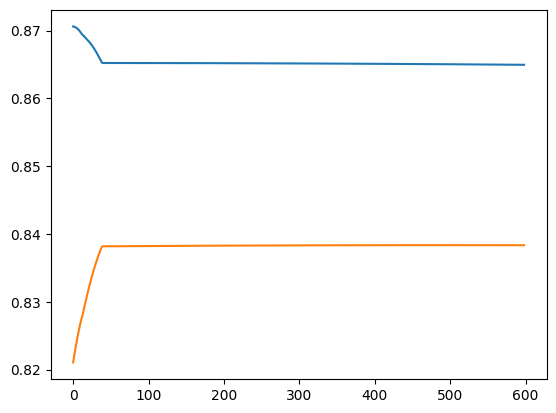

In [55]:
# Plot both accuracies
plt.plot(train_accuracies)
plt.plot(test_accuracies)

For alpha = 488, we obtain the highest testing accuracy of 83.835 % having having a difference of 2.668 with training accuracy.

In [56]:
# Create the Lasso regression model with alpha = 488

l1 = Lasso(alpha=488)
l1.fit(xtrain,ytrain)
l1.score(xtrain,ytrain), l1.score(xtest,ytest)

(0.8650341837560482, 0.8383489567698093)

# Ridge Regression Model

In [57]:
# Create a Ridge regression model
l2 = Ridge()
l2.fit(xtrain,ytrain)
l2.score(xtrain,ytrain), l2.score(xtest,ytest)

(0.8705991292739512, 0.8207422659244608)

In [58]:
# Hyperparameter tuning

for i in range(1000,4000):
    l2 = Ridge(alpha=i)
    l2.fit(xtrain,ytrain)
    print(f'Alpha: {i} Train: {l2.score(xtrain,ytrain)} Test: {l2.score(xtest,ytest)}')

Alpha: 1000 Train: 0.8658287300066563 Test: 0.8373601688132323
Alpha: 1001 Train: 0.8658281926761449 Test: 0.83736066730038
Alpha: 1002 Train: 0.8658276562697121 Test: 0.8373611645448722
Alpha: 1003 Train: 0.8658271207848365 Test: 0.837361660550276
Alpha: 1004 Train: 0.8658265862190058 Test: 0.8373621553201461
Alpha: 1005 Train: 0.8658260525697166 Test: 0.8373626488580225
Alpha: 1006 Train: 0.8658255198344748 Test: 0.8373631411674319
Alpha: 1007 Train: 0.8658249880107952 Test: 0.8373636322518879
Alpha: 1008 Train: 0.8658244570962017 Test: 0.8373641221148902
Alpha: 1009 Train: 0.8658239270882272 Test: 0.8373646107599253
Alpha: 1010 Train: 0.8658233979844131 Test: 0.8373650981904659
Alpha: 1011 Train: 0.8658228697823103 Test: 0.8373655844099723
Alpha: 1012 Train: 0.865822342479478 Test: 0.837366069421891
Alpha: 1013 Train: 0.8658218160734845 Test: 0.837366553229655
Alpha: 1014 Train: 0.8658212905619066 Test: 0.8373670358366854
Alpha: 1015 Train: 0.86582076594233 Test: 0.837367517246389
A

At alpha = 2102, we obtain highest testing accuracy of 83.754 %

In [59]:
# Create a new Ridge regression model with alpha = 2102

l2 = Ridge(alpha=2102)
l2.fit(xtrain,ytrain)
l2.score(xtrain,ytrain), l2.score(xtest,ytest)

(0.8655162017110345, 0.8375412766360154)

In [60]:
reg_accuracy = pd.DataFrame()
reg_accuracy['Regression type'] = ['Linear regression','Lasso Regression','Ridge Regression']
reg_accuracy['Accuracy'] = [m1.rsquared, l1.score(xtest,ytest),l2.score(xtest,ytest)]
reg_accuracy

,Regression type,Accuracy
0,Linear regression,0.870601
1,Lasso Regression,0.838349
2,Ridge Regression,0.837541


Thus we created three different regression models where we see that the training and testing accuracies are more generalized in the Lasso and Ridge, and Lasso performing slightly better in this case.

1.What is Normalization & Standardization and how is it helpful?
Ans:
- Normalization is the process that involves scaling a set of values or any distribution such that the values will always range from 0 to 1. 
- Standardization is another feature scaling process that involves scaling the data in such a way that their mean will equal to zero and standard deviation will equal to 1.
- Both these feature scaling methods are important because when creating a model that involves calculation of distances/variance between features having values across different ranges, the model will give highest importance to those values whose magnitudes are highest even if in real world those high magnitudes may not have such high importance, thereby the model understands that each feature contributes equally to the analysis.

2.What techniques can be used to address multicollinearity in multiple linear regression?
Ans:
- Variance Inflation Factor: Using the VIF value we can decide if the model has any multicollinearity issues. VIF values < 5 are considered to have low multicollinearity, VIF > 5 are considered to have moderate to high multicollinearity.
- Feature selection/transformation: We can either combine or split features based on domain knowledge and thus multicollinearity can be reduced by considering only relevant features for the analysis.
- Regularization: Using Lasso, Ridge or ElasticNet regression methods, we can greatly reduce the multicollinearity from the model using the hyperparameter.
- Pearson's correlation: Using the Pearson's correlation we can identify which features are dependent on each other and the strength of their relationship. The correlation values rangs from -1 to +1 where -1 and +1 are signifying strong relationship whereas a value of 0 denotes no relationship.